### KNN Classifier example using Traffic prediction dataset

Name : Mrunmayee Sandeep Damle <br>
T.Y B.Tech CSBS <br>
Roll no : 11 <br>

1) Importing required libraries for data processing and visualization

In [2]:
import pandas as pd
import seaborn as sns

2) Loading the traffic dataset from a CSV file

In [3]:
df = pd.read_csv(r'D:\my stuff\Coding\ML\datasets\Traffic.csv')

3) Displaying dataset structure and basic statistical information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day_of_the_week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic_Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [6]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


4) Showing the first few rows of the dataset

In [7]:
df.head()

,Time,Date,Day_of_the_week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic_Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


5) Selecting only numerical columns to compute correlation matrix

In [8]:
my_df = df.select_dtypes(exclude=[object])
my_df.corr()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
Date,1.000000,-0.013453,-0.005089,-0.015536,0.024734,-0.010679
CarCount,-0.013453,1.000000,0.722539,0.692994,-0.628157,0.970443
BikeCount,-0.005089,0.722539,1.000000,0.566364,-0.575399,0.797429
BusCount,-0.015536,0.692994,0.566364,1.000000,-0.546931,0.790705
TruckCount,0.024734,-0.628157,-0.575399,-0.546931,1.000000,-0.555471
Total,-0.010679,0.970443,0.797429,0.790705,-0.555471,1.000000


6) Creating a new DataFrame with selected relevant columns

In [9]:
df1 = df[['Time', 'Day_of_the_week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic_Situation']]

In [10]:
df1.head()

,Time,Day_of_the_week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic_Situation
0,12:00:00 AM,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,Tuesday,57,6,15,16,94,normal


7) Checking for missing values in the selected DataFrame

In [11]:
df1.isnull().sum()

Time                 0
Day_of_the_week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic_Situation    0
dtype: int64

8) Plotting boxplots to detect outliers in each feature

<Axes: ylabel='Time'>

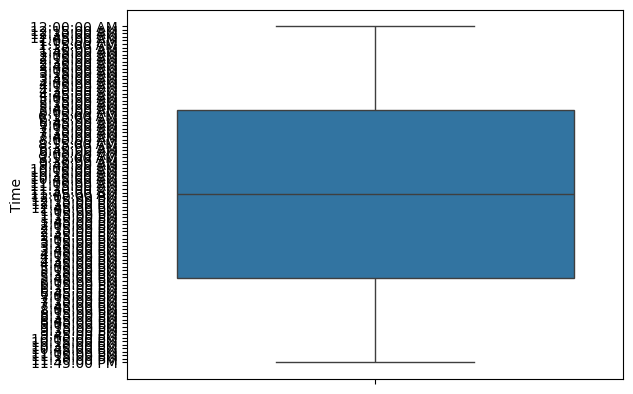

In [12]:
sns.boxplot(df1.Time)

<Axes: ylabel='Day_of_the_week'>

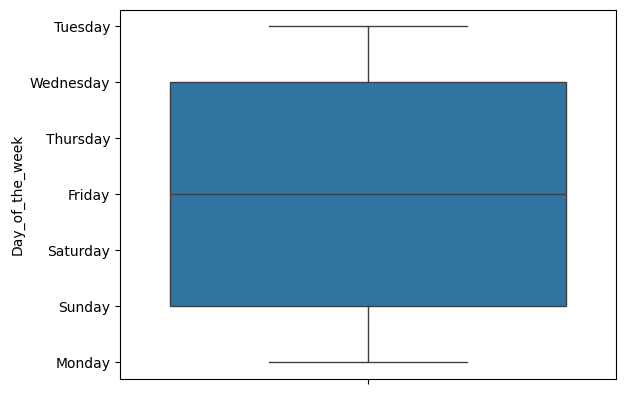

In [13]:
sns.boxplot(df1.Day_of_the_week)

<Axes: ylabel='CarCount'>

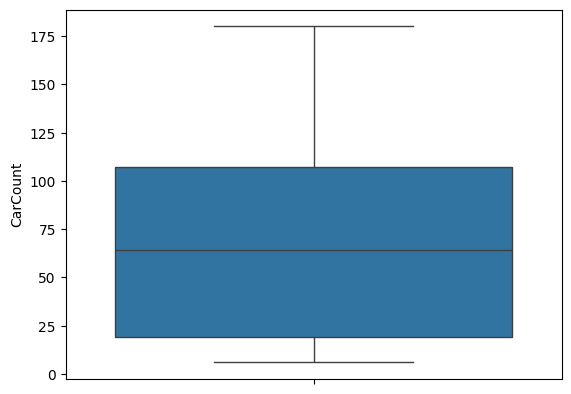

In [14]:
sns.boxplot(df1.CarCount)

<Axes: ylabel='BikeCount'>

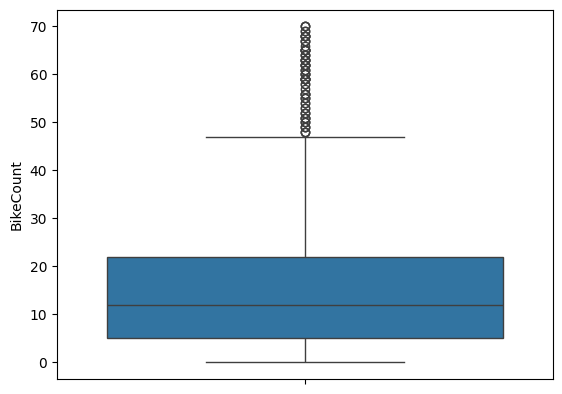

In [15]:
sns.boxplot(df1.BikeCount)

9) Removing outliers using IQR method 

<Axes: ylabel='BikeCount'>

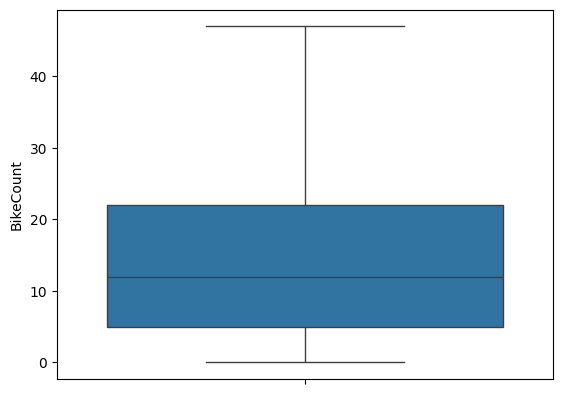

In [16]:
Q1 = df1['BikeCount'].quantile(0.25)
Q3 = df1['BikeCount'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['BikeCount'] > l_limit) & (df1['BikeCount'] < u_limit)]
sns.boxplot(df2.BikeCount)

<Axes: ylabel='BusCount'>

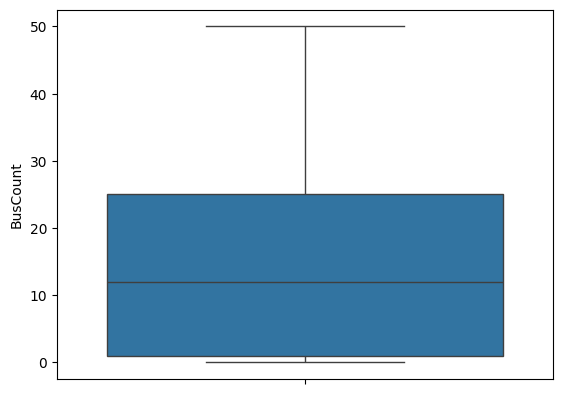

In [17]:
sns.boxplot(df1.BusCount)

<Axes: ylabel='TruckCount'>

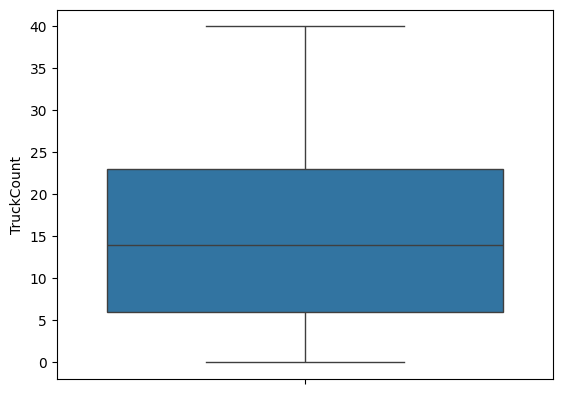

In [18]:
sns.boxplot(df1.TruckCount)

<Axes: ylabel='Total'>

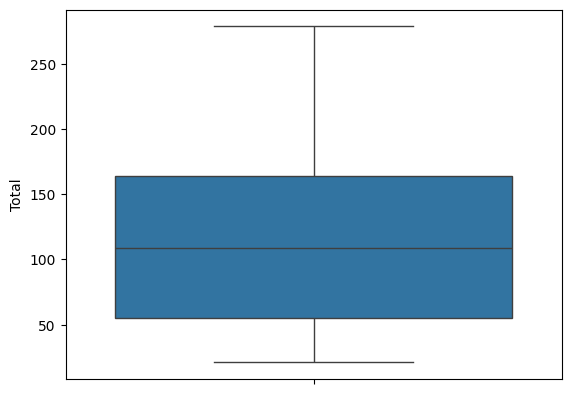

In [19]:
sns.boxplot(df1.Total)

<Axes: ylabel='Traffic_Situation'>

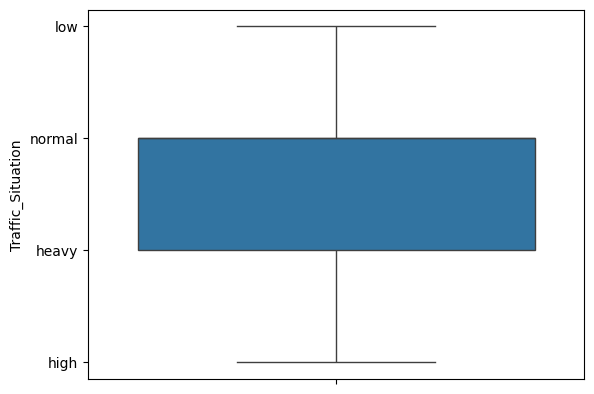

In [20]:
sns.boxplot(df1.Traffic_Situation)

10) Displaying information of DataFrame after outlier removal

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2899 entries, 0 to 2975
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2899 non-null   object
 1   Day_of_the_week    2899 non-null   object
 2   CarCount           2899 non-null   int64 
 3   BikeCount          2899 non-null   int64 
 4   BusCount           2899 non-null   int64 
 5   TruckCount         2899 non-null   int64 
 6   Total              2899 non-null   int64 
 7   Traffic_Situation  2899 non-null   object
dtypes: int64(5), object(3)
memory usage: 203.8+ KB


11) Encoding  using LabelEncoder

In [22]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df2['Time'] = lb.fit_transform(df2['Time'])

C:\Users\Mrunmayee\AppData\Local\Temp\ipykernel_20532\3336912366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Time'] = lb.fit_transform(df2['Time'])


In [23]:
df2

,Time,Day_of_the_week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic_Situation
0,16,Tuesday,31,0,4,4,39,low
1,18,Tuesday,49,0,3,3,55,low
2,20,Tuesday,46,0,3,6,55,low
3,22,Tuesday,51,0,2,5,58,low
4,24,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...
2971,7,Thursday,16,3,1,36,56,normal
2972,9,Thursday,11,0,1,30,42,normal
2973,11,Thursday,15,4,1,25,45,normal
2974,13,Thursday,16,5,0,27,48,normal


In [24]:
df2['Day_of_the_week'] = lb.fit_transform(df2['Day_of_the_week'])

C:\Users\Mrunmayee\AppData\Local\Temp\ipykernel_20532\3495035982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Day_of_the_week'] = lb.fit_transform(df2['Day_of_the_week'])


In [25]:
df2

,Time,Day_of_the_week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic_Situation
0,16,5,31,0,4,4,39,low
1,18,5,49,0,3,3,55,low
2,20,5,46,0,3,6,55,low
3,22,5,51,0,2,5,58,low
4,24,5,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...
2971,7,4,16,3,1,36,56,normal
2972,9,4,11,0,1,30,42,normal
2973,11,4,15,4,1,25,45,normal
2974,13,4,16,5,0,27,48,normal


In [26]:
df2['Traffic_Situation'] = lb.fit_transform(df2['Traffic_Situation'])
df2

C:\Users\Mrunmayee\AppData\Local\Temp\ipykernel_20532\1246601532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Traffic_Situation'] = lb.fit_transform(df2['Traffic_Situation'])


,Time,Day_of_the_week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic_Situation
0,16,5,31,0,4,4,39,2
1,18,5,49,0,3,3,55,2
2,20,5,46,0,3,6,55,2
3,22,5,51,0,2,5,58,2
4,24,5,57,6,15,16,94,3
...,...,...,...,...,...,...,...,...
2971,7,4,16,3,1,36,56,3
2972,9,4,11,0,1,30,42,3
2973,11,4,15,4,1,25,45,3
2974,13,4,16,5,0,27,48,3


12) Importing modules for model training and evaluation

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

13) Displaying final structure of the processed DataFrame

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2899 entries, 0 to 2975
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Time               2899 non-null   int32
 1   Day_of_the_week    2899 non-null   int32
 2   CarCount           2899 non-null   int64
 3   BikeCount          2899 non-null   int64
 4   BusCount           2899 non-null   int64
 5   TruckCount         2899 non-null   int64
 6   Total              2899 non-null   int64
 7   Traffic_Situation  2899 non-null   int32
dtypes: int32(3), int64(5)
memory usage: 169.9 KB


14) Defining features (X) and target variable (y) for classification

In [29]:
x = df2[['Time', 'Day_of_the_week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']]
y = df2[['Traffic_Situation']]

15) Splitting data into training and testing sets (80%-20%)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

16) Training the K-Nearest Neighbors classifier with k=5

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(x_train, y_train)

c:\Users\Mrunmayee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


17) Predicting the target variable on the test data

In [32]:
y_pred = model.predict(x_test)

18) Printing classification report to evaluate the model performance

In [33]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       112
           1       0.87      0.87      0.87        68
           2       0.84      0.73      0.78        67
           3       0.93      0.94      0.93       333

    accuracy                           0.91       580
   macro avg       0.89      0.88      0.88       580
weighted avg       0.91      0.91      0.91       580



In [34]:
df2

,Time,Day_of_the_week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic_Situation
0,16,5,31,0,4,4,39,2
1,18,5,49,0,3,3,55,2
2,20,5,46,0,3,6,55,2
3,22,5,51,0,2,5,58,2
4,24,5,57,6,15,16,94,3
...,...,...,...,...,...,...,...,...
2971,7,4,16,3,1,36,56,3
2972,9,4,11,0,1,30,42,3
2973,11,4,15,4,1,25,45,3
2974,13,4,16,5,0,27,48,3


19) Predicting traffic situation for a new sample input

In [35]:
predicted = model.predict([[11, 4, 15, 4, 1, 25, 45]])
decoded = lb.inverse_transform(predicted)
print(decoded)

['normal']


c:\Users\Mrunmayee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


20) Displaying the confusion matrix to assess classification accuracy

In [36]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[108,   4,   0,   0],
       [  2,  59,   0,   7],
       [  0,   0,  49,  18],
       [  7,   5,   9, 312]], dtype=int64)